# ONTARIO SCHOOLS WITH COVID-19 CASES ANALYSIS
## Peter Stangolis

#### [Data URL:](https://data.ontario.ca/dataset/b1fef838-8784-4338-8ef9-ae7cfd405b41/resource/7fbdbb48-d074-45d9-93cb-f7de58950418/download/schoolcovidsummary.csv) 

## Graphical Data Exploration

### Import the required libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import figure

from pylab import rcParams
#rcParams['figure.figsize'] = 18, 6

import datetime
import seaborn as sns

In [74]:
# Graph Style Settings:

rcParams['figure.figsize'] = 18, 6

sns.set(font_scale=1.5, style="whitegrid")

%matplotlib inline

### Import the cleaned data set 

In [69]:
df = pd.read_csv("ont_school_covid19_101.csv",
                parse_dates=True)

df.tail()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
45,2020-11-16,683,1,4828,106,63,14,29.0,1143.0,3387,1913,423,1051.0
46,2020-11-17,670,1,4828,133,73,23,37.0,1126.0,3518,1985,445,1088.0
47,2020-11-18,670,3,4828,109,92,17,0.0,1121.0,3626,2077,461,1088.0
48,2020-11-19,680,3,4828,91,75,16,0.0,1143.0,3710,2147,476,1087.0
49,2020-11-20,681,3,4828,87,60,27,0.0,1150.0,3803,2209,507,1087.0


## Initial Line Plot of Cumulative Cases from Sept - Nov 2020

Text(0.5, 0.98, '2020-09-11 - 2020-11-20')

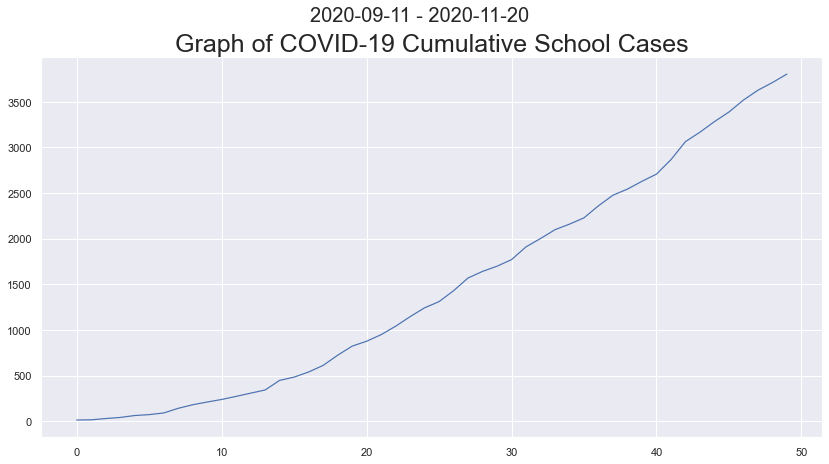

In [76]:
sns.set(rc={'figure.figsize':(14, 7)})

subtitle = f"{min(df['reported_date'])} - {max(df['reported_date'])}"

df['cumulative_school_related_cases'].plot(linewidth=1.2)
plt.title("Graph of COVID-19 Cumulative School Cases",
         fontsize=25)
plt.suptitle(subtitle,
            fontsize = 20)

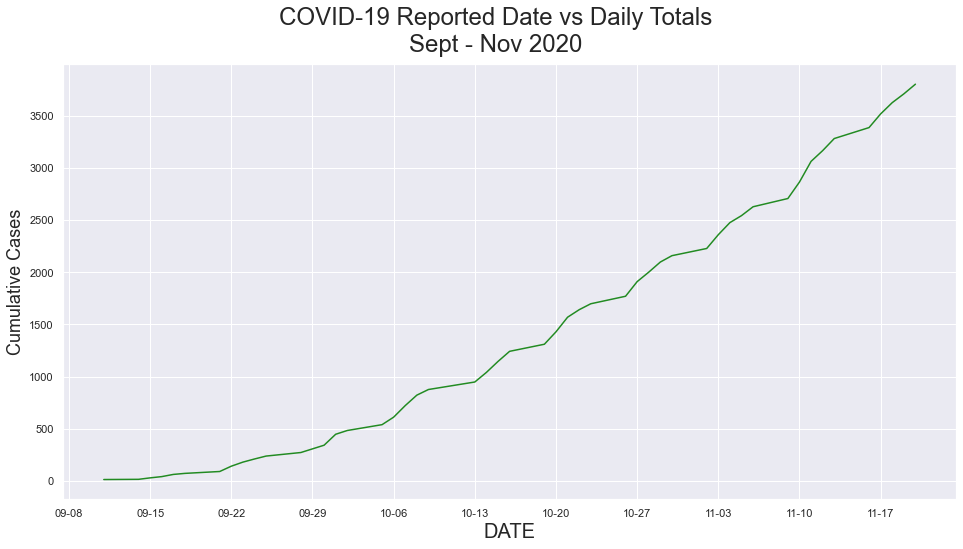

In [95]:
import matplotlib.dates as mdates


fig, ax =  plt.subplots(figsize=(16, 8))

ax.plot(df['reported_date'].values, df['cumulative_school_related_cases'],
       color="Forestgreen")

ax.set_ylabel("Cumulative Cases")
ax.set_xlabel("DATE")
#ax.set_xlim(["2020-09-01", "2020-11-30"])
fig.suptitle("COVID-19 Reported Date vs Daily Totals\nSept - Nov 2020", fontsize=24, fontweight='medium')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(18)


# Ensure a tick for each week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

<Figure size 1152x576 with 0 Axes>

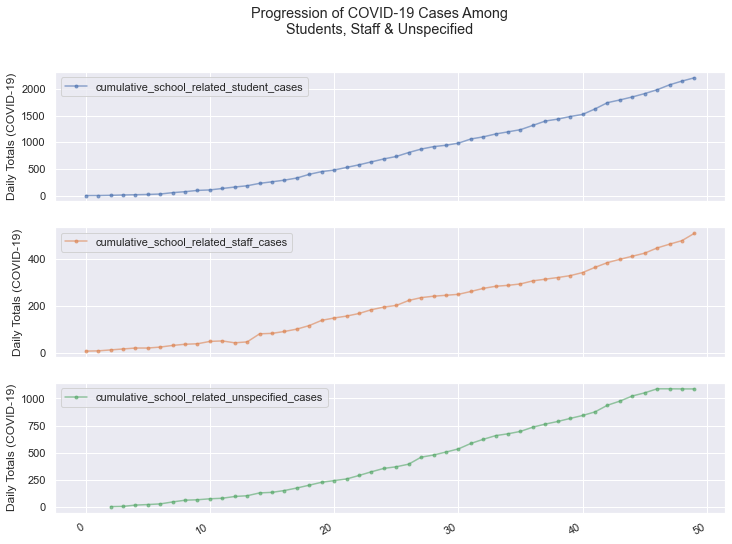

In [88]:
plt.figure(figsize=(16, 8))

cols = ['cumulative_school_related_student_cases', 'cumulative_school_related_staff_cases', 'cumulative_school_related_unspecified_cases']
axes = df[cols].plot(marker='.', alpha = 0.6, linestyle = None, figsize=(12, 9), subplots = True)
for ax in axes:
    ax.set_ylabel("Daily Totals (COVID-19)")
    
plt.suptitle("Progression of COVID-19 Cases Among\nStudents, Staff & Unspecified")
plt.show()

### The Number of Days Since First Reported Date

In [86]:
df['reported_date'] = pd.to_datetime(df['reported_date'])
df.dtypes

reported_date                                  datetime64[ns]
current_schools_w_cases                                 int64
current_schools_closed                                  int64
current_total_number_schools                            int64
new_total_school_related_cases                          int64
new_school_related_student_cases                        int64
new_school_related_staff_cases                          int64
new_school_related_unspecified_cases                  float64
recent_total_school_related_cases                     float64
cumulative_school_related_cases                         int64
cumulative_school_related_student_cases                 int64
cumulative_school_related_staff_cases                   int64
cumulative_school_related_unspecified_cases           float64
dtype: object

In [91]:
days_since_first_reported_cases = abs(min((df['reported_date']) - max(df['reported_date'])).days)


In [93]:
print(f"Days since first reported cases in schools: {days_since_first_reported_cases}")


Days since first reported cases in schools: 70


## New Daily COVID-19 Case Numbers for Students, Staff and Unspecified

<Figure size 1152x576 with 0 Axes>

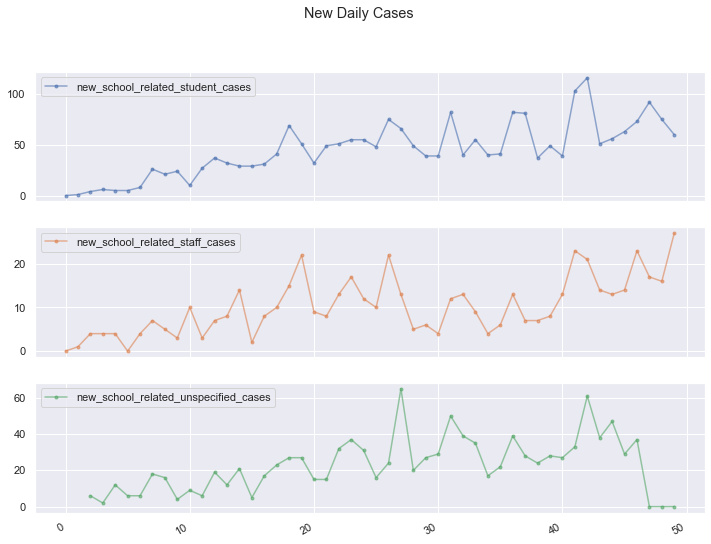

In [94]:
plt.figure(figsize=(16, 8))

cols = ['new_school_related_student_cases', 'new_school_related_staff_cases', 'new_school_related_unspecified_cases']
axes = df[cols].plot(marker='.', alpha = 0.6, linestyle = None, figsize=(12, 9), subplots = True)
ax.set_ylabel("Daily Totals (COVID-19)")
plt.suptitle("New Daily Cases")
plt.show()

<Figure size 1152x360 with 0 Axes>

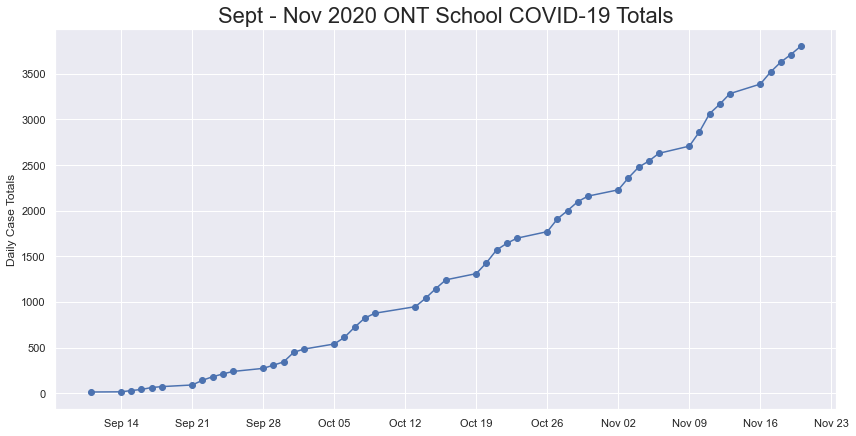

In [96]:
plt.figure(figsize=(16, 5))

fig, ax = plt.subplots()
ax.plot(df['reported_date'], df['cumulative_school_related_cases'], marker='o', linestyle='-')
ax.set_ylabel('Daily Case Totals')
ax.set_title('Sept - Nov 2020 ONT School COVID-19 Totals', size = 22)
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));